پارسا شریفی 9910176

توجه توجه!!!!!!!!!!!!!

سلام
من اول منظور سوال رو یکم متفاوت فهمیدم و یک پیاده سازی انجام دادم و یک گزارش ازش نوشتم، خد کد اصلی توی فایل پایتون با نام main هست و ریپورتش هم به صورت ورد و pdf قرار دادم، بعد این رو پیاده کردم که میشه کار اصلی

In [45]:
import numpy as np
import random
import matplotlib.pyplot as plt

ابتدا ورودی های سوال را میگیریم و آن ها را جایگذاری میکنیم.

In [31]:
#get inputs
n = int(input())

start_prob = []
input_ = input().split()

for i in range(n):
    start_prob.append(float(input_[i]))

matrix_prob = [[] for i in range(n)]

input_.clear()
for i in range(n):
    input_ = input().split()
    for j in range(n):
        matrix_prob[i].append(float(input_[j]))

3
0 0 1
.3 .2 .5
.4 .3 .3
.3 .4 .3


In [32]:
start_prob_holder = start_prob.copy()

In [33]:
matrix_prob_holder = matrix_prob.copy()

In [34]:
matrix_prob_holder

[[0.3, 0.2, 0.5], [0.4, 0.3, 0.3], [0.3, 0.4, 0.3]]

با استفاده از تابع زیر میتوان احتمال واقعی را به دست آورد، در این جا یک تعداد استپ میگیریم که طبق آن جلو میرویم.

In [35]:
def real_prob(number_of_steps):

    return np.matmul(start_prob_holder, np.linalg.matrix_power(matrix_prob_holder, number_of_steps))


In [36]:
real_probs = real_prob(1000)


In [37]:
real_probs

array([0.33035714, 0.30357143, 0.36607143])

در ادامه برای ماتریس های احتمالات توزیع تجمعی آن ها را به دست می‌آوریم تا وقتی که یک عدد رندوم انتخاب میکنیم بتوانیم از آن استفاده کنیم

In [38]:
#calculating cumulative distribution
for i in range(1,n):
    start_prob[i] = start_prob[i] + start_prob[i-1]

for i in range(n):
    for j in range(1,n):
        matrix_prob[i][j] = matrix_prob[i][j-1] + matrix_prob[i][j]


در ادامه یک تابه میزنیم که با گرفتن تعداد استب برای شبیه سازی و استپ ها برای پیشروی در جدول مارکف را گرفته و طبق آن شبیه سازی را انجام میدهد
یک حلقه داریم که بیرونی ترین حلقه حساب شده و به این تعداد کل فرایند شبیه سازی را انجام میدهیم 
در هر بار شبیه سازی به تعداد استپ برای پیشروی در زنجیره مارکف عدد رندوم جنریت کرده و با استفاده از ماتریس های تشخیص میدهیم که به چه استیتی برویم. در همین حین تعداد ورورد به استیت ها را بروز میکنیم و به تعداد استیتی که به ان وارد میشویم یکی اضافه میکنیم.
و با بروز کردن تعداد، احتمالات مربوط به حالات را به حساب میکنیم. به این شکل که چون تعداد های ورود به یکی از استیت ها یکی زیاد شده و همچنین یک سمپل جدید در ادامه سمپل های قدیم گرفتیم میتوانیم اعداد را بروز کنیم.


In [25]:
def find_prob(simulation_num , step_num):
    hold_probs = []
    for i in range(n):
        hold_probs.append([])

    counting_states = []
    for i in range(n):
        counting_states.append(0)
    for q in range(simulation_num):

        current_state = -1
        random_number = random.random()
        sample_counter = 0

        # get samples for one simulation
        for i in range(n):
            if (random_number < start_prob[i]):
                current_state = i
                #counting_states[i] = counting_states[i] + 1
                sample_counter += 1
                break

        for i in range(step_num):
            random_number = random.random()
            for j in range(n):
                if (random_number < matrix_prob[current_state][j]):
                    current_state = j
                    sample_counter += 1
                    break

        counting_states[current_state] = counting_states[current_state] + 1

    for k in range(n):
        hold_probs[k] = counting_states[k] / simulation_num

    return hold_probs


In [39]:
print(find_prob(10000 , 1000))

[0.3305, 0.3067, 0.3628]


به کمک رسم نمودار تاثیر تعداد قدم در هر دور شبیە سازی وتعداد بار های شبیە سازی در دقت احتمالهای بدست آمده را نشان میدهیم.
هر بار یکی را ثابت میگیریم و انواع ورودی ها را برای مورد دیگر میدهیم، ارور با میزان واقعی را ثبت کرده و نمودار مربوطه را رسم میکنیم.

Text(0, 0.5, 'error')

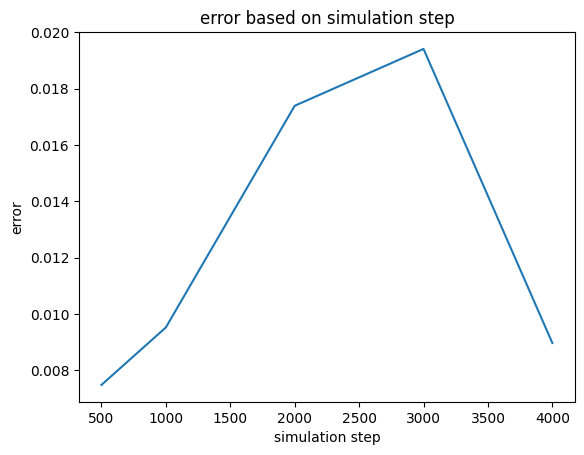

In [40]:
error_list = []
simulation_step_sample = [500, 1000, 2000, 3000, 4000]
for step in simulation_step_sample:
  error = np.linalg.norm(real_probs - find_prob(step, 1000))
  error_list.append(error)

plt.plot(simulation_step_sample, error_list, label = f"line for state ")
plt.title('error based on simulation step')
plt.xlabel('simulation step')
plt.ylabel('error')


در بالا ابتدا با زیاد شدن تعداد دفعات شبیه سازی دقت کم شده و اندازه ارور کم میشود، این میتواند به دلیل رفتار رندوم در زینجیره مارکف باشد پس نمیتوان دقیق رفتار تابع را پیشبینی کرد، اگر تعداد دفعات را بیشتر بگیریم میتواند با دقت بهتری عمل کند که این کار را در پیاده سازی دیگر به نوعی انجام دادیم.

Text(0, 0.5, 'error')

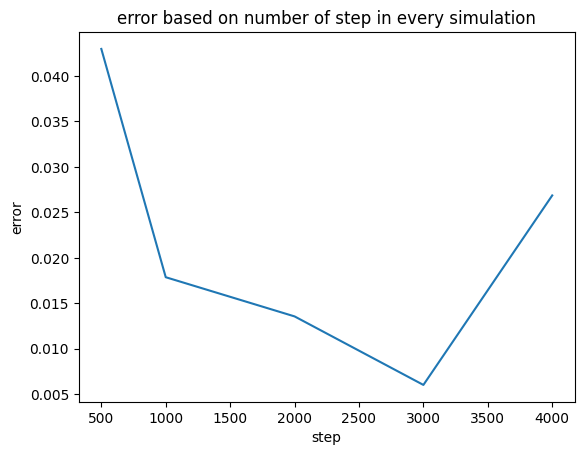

In [42]:
error_list = []
simulation_step_sample = [500, 1000, 2000, 3000, 4000]
for step in simulation_step_sample:
  error = np.linalg.norm(real_probs - find_prob(1000, step))
  error_list.append(error)

plt.plot(simulation_step_sample, error_list, label = f"line for state ")

plt.title('error based on number of step in every simulation')
plt.xlabel('step')
plt.ylabel('error')


در این جا تا 3000 دور میزان ارور کاهشی است اما ناگهان ارور زیاد میشود که باز هم میتواند به دلیل رفتار رندوم باشد  تا جایی نشان دهنده بهتر شدن دقت با بالارفتن تعداد دور ها میباشد.

Text(0, 0.5, 'error')

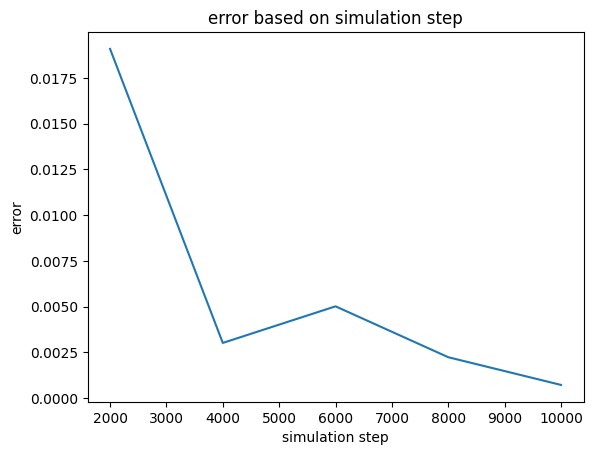

In [43]:
error_list = []
simulation_step_sample = [2000, 4000, 6000, 8000, 10000]
for step in simulation_step_sample:
  error = np.linalg.norm(real_probs - find_prob(step, 1000))
  error_list.append(error)

plt.plot(simulation_step_sample, error_list, label = f"line for state ")
plt.title('error based on simulation step')
plt.xlabel('simulation step')
plt.ylabel('error')


دلم راضی نشد به اون تعداد =)
دوباره انجام دادم ولی این بار با تعداد بیشتر، همونطور که میبینید با دقت خیلی خوبی در تعداد دور زیاد همگرا میشه به جواب اصلی، بیشتر از این نمیشد تعداد رو برد بالا چون به مشکل میخورد توی ران کردن

Text(0, 0.5, 'error')

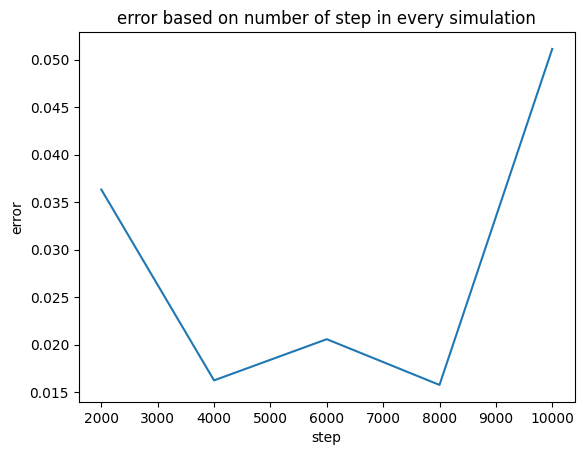

In [44]:
error_list = []
simulation_step_sample = [2000, 4000, 6000, 8000, 10000]
for step in simulation_step_sample:
  error = np.linalg.norm(real_probs - find_prob(1000, step))
  error_list.append(error)

plt.plot(simulation_step_sample, error_list, label = f"line for state ")

plt.title('error based on number of step in every simulation')
plt.xlabel('step')
plt.ylabel('error')


در این جا با زیاد شدن تعداد استپ ها در هر شبیه سازی، تا یک دقت زیاد شده اما در ادامه دقت کم شده میتوان گفت برای محاسبه احتمالات بین تعداد استپ و دقت یک رابطه خطی وجود ندارد و باید بهترین تعداد را انتخاب کرد برعکس قسمت قبلی که با زیاد شدن تعداد شبیه سازی دقت بالاتر میرود